<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [42]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data


Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [38]:
 house_csv = "Sacramento_transactions.csv"
df = pd.read_csv(house_csv)

In [9]:
print(df.head())

             street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768  


In [11]:
print(df.describe())

                zip        beds       baths       sq__ft          price  \
count    985.000000  985.000000  985.000000   985.000000     985.000000   
mean   95750.697462    2.911675    1.776650  1314.916751  234144.263959   
std       85.176072    1.307932    0.895371   853.048243  138365.839085   
min    95603.000000    0.000000    0.000000     0.000000    1551.000000   
25%    95660.000000    2.000000    1.000000   952.000000  145000.000000   
50%    95762.000000    3.000000    2.000000  1304.000000  213750.000000   
75%    95828.000000    4.000000    2.000000  1718.000000  300000.000000   
max    95864.000000    8.000000    5.000000  5822.000000  884790.000000   

         latitude   longitude  
count  985.000000  985.000000  
mean    38.607732 -121.355982  
std      0.145433    0.138278  
min     38.241514 -121.551704  
25%     38.482717 -121.446127  
50%     38.626582 -121.376220  
75%     38.695589 -121.295778  
max     39.020808 -120.597599  


In [13]:
print(df.isnull().sum())

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64


In [15]:
print(df.dtypes)

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object


In [48]:


print(df.columns)

Index(['zip', 'beds', 'baths', 'sq__ft', 'price', 'latitude', 'longitude',
       'street_10 SEA FOAM CT', 'street_100 CHELSEA CT',
       'street_100 CRYSTALWOOD CIR',
       ...
       'city_WILTON', 'type_Multi-Family', 'type_Residential', 'type_Unkown',
       'sale_date_Mon May 19 00:00:00 EDT 2008',
       'sale_date_Thu May 15 00:00:00 EDT 2008',
       'sale_date_Tue May 20 00:00:00 EDT 2008',
       'sale_date_Wed May 21 00:00:00 EDT 2008', 'predicted_price',
       'residuals'],
      dtype='object', length=1034)


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [53]:
# ANSWER
target_variable = 'price'
print(f"Target Variable: {target_variable}")



Target Variable: price


#### 2.2 List all possible variables which might be Predictor variable.

In [23]:
# ANSWER
predictor_variables = df.columns[df.columns != target_variable].tolist()
print("Predictor Variables:")
for var in predictor_variables:
    print(var)

Predictor Variables:
zip
beds
baths
sq__ft
latitude
longitude
street_10 SEA FOAM CT
street_100 CHELSEA CT
street_100 CRYSTALWOOD CIR
street_100 CRYSTALWOOD WAY
street_100 REBECCA WAY
street_100 TOURMALINE CIR
street_10001 WOODCREEK OAKS BLVD Unit 1415
street_10001 WOODCREEK OAKS BLVD Unit 815
street_1001 RIO NORTE WAY
street_1005 MORENO WAY
street_10062 LINCOLN VILLAGE DR
street_10085 ATKINS DR
street_10104 ANNIE ST
street_10105 MONTE VALLO CT
street_10112 LAMBEAU CT
street_10133 NEBBIOLO CT
street_10158 CRAWFORD WAY
street_1016 CONGRESS AVE
street_10165 LOFTON WAY
street_10245 LOS PALOS DR
street_10254 JULIANA WAY
street_1028 FALLON PLACE CT
street_1032 SOUZA DR
street_1033 PARK STREAM DR
street_1035 MILLET WAY
street_10372 VIA CINTA CT
street_104 CATLIN CT
street_1042 STARBROOK DR
street_1044 GALSTON DR
street_1050 FOXHALL WAY
street_10542 SILVERWOOD WAY
street_106 FARHAM DR
street_10629 BASIE WAY
street_1069 ACACIA AVE
street_107 JARVIS CIR
street_108 CRYSTALWOOD WAY
street_1080 RIO

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [56]:
# ANSWER
correlations = df.corr()[target_variable].drop(target_variable)
best_predictor = correlations.abs().idxmax()
best_correlation = correlations.abs().max()
print(f"Best Predictor Variable: {best_predictor}")
print(f"Correlation Value: {best_correlation}")

Best Predictor Variable: baths
Correlation Value: 0.416208066653066


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict the price of a house using the price values alone? (Hint: it is a simple calculation)



In [58]:
# ANSWER
average_price = df['price'].mean()
predicted_price = average_price
print(f"Predicted Price of a New House: {predicted_price}")

Predicted Price of a New House: 234144.26395939087


#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [62]:
# ANSWER
average_price = df['price'].mean()
df['predicted_price'] = average_price
df['residuals'] = abs(df['price'] - df['predicted_price'])
print(df[['price', 'predicted_price', 'residuals']].head())


   price  predicted_price      residuals
0  59222    234144.263959  174922.263959
1  68212    234144.263959  165932.263959
2  68880    234144.263959  165264.263959
3  69307    234144.263959  164837.263959
4  81900    234144.263959  152244.263959


#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [20]:
# ANSWER
X = df['sq__ft']  
Y = df['price'] 



##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [22]:
mean_x = X.mean()
mean_y = Y.mean()

 
numerator = ((X - mean_x) * (Y - mean_y)).sum()
denominator = ((X - mean_x) ** 2).sum()
beta_1 = numerator / denominator

# Calculate beta_0 (intercept)
beta_0 = mean_y - beta_1 * mean_x

print(f"Intercept (beta_0): {beta_0}")
print(f"Slope (beta_1): {beta_1}")


Intercept (beta_0): 162930.16140699777
Slope (beta_1): 54.158639688530755


##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [24]:
mean_x = X.mean()
mean_y = Y.mean()

 
numerator = ((X - mean_x) * (Y - mean_y)).sum()
denominator = ((X - mean_x) ** 2).sum()
beta_1 = numerator / denominator

# Calculate beta_0 (intercept)
beta_0 = mean_y - beta_1 * mean_x

print(f"Intercept (beta_0): {beta_0}")
print(f"Slope (beta_1): {beta_1}")


Intercept (beta_0): 162930.16140699777
Slope (beta_1): 54.158639688530755


##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [26]:
# ANSWER
beta_0 = mean_y - beta_1 * mean_x
Yhat = beta_0 + beta_1 * X
print(f"Intercept (beta_0): {beta_0}")
print(f"Slope (beta_1): {beta_1}")

Intercept (beta_0): 162930.16140699777
Slope (beta_1): 54.158639688530755


##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [28]:
# ANSWER
residuals = Y - Yhat
absolute_residuals = abs(residuals)
print(f"First few residuals:\n{residuals.head()}")
print(f"First few absolute residuals:\n{absolute_residuals.head()}")


First few residuals:
0   -148984.784187
1   -157921.293924
2   -137160.438599
3   -139766.322422
4   -124194.597239
dtype: float64
First few absolute residuals:
0    148984.784187
1    157921.293924
2    137160.438599
3    139766.322422
4    124194.597239
dtype: float64


##### 2.7.E Find R-Squared

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [30]:
# ANSWER
ss_res = (residuals ** 2).sum()
ss_tot = ((Y - mean_y) ** 2).sum()
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared}")

R-squared: 0.11148717682951459


##### 2.7.F [BONUS] Draw Plot of Predicted Line

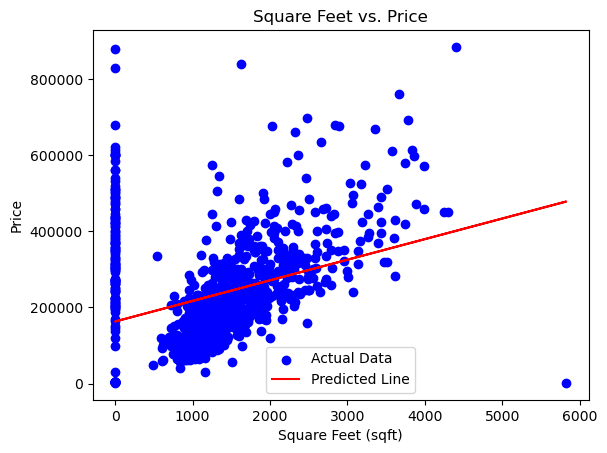

In [44]:
# ANSWER
Yhat = beta_0 + beta_1 * X
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Yhat, color='red', label='Predicted Line')
plt.xlabel('Square Feet (sqft)')
plt.ylabel('Price')
plt.title('Square Feet vs. Price')
plt.legend()
plt.show()

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

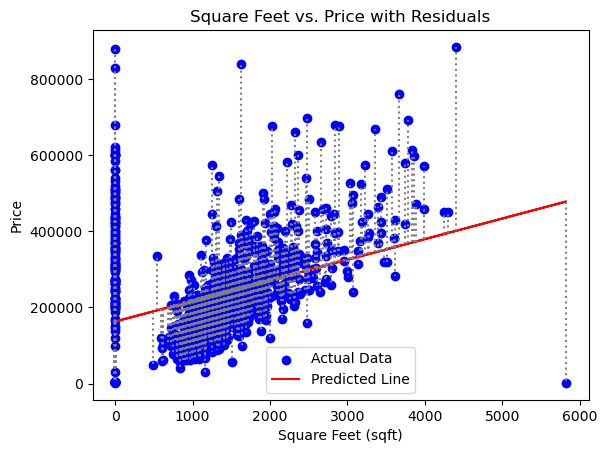

In [46]:
# ANSWER
residuals = Y - Yhat
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Yhat, color='red', label='Predicted Line')
for i in range(len(X)):
    plt.vlines(X.iloc[i], Yhat.iloc[i], Y.iloc[i], color='gray', linestyle='dotted')
plt.xlabel('Square Feet (sqft)')
plt.ylabel('Price')
plt.title('Square Feet vs. Price with Residuals')
plt.legend()
plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [52]:
# ANSWER
house_sqft = 1204
predicted_price = beta_0 + beta_1 * house_sqft
print(f"The predicted price of the house is: ${predicted_price:.2f}")

The predicted price of the house is: $228137.16




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



